In [1]:
# Libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns

In [2]:
df = pd.read_csv('ev_battery_charging_data.csv')
print(f'Downloaded CSV Data:')
df.head()

Downloaded CSV Data:


,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Degradation Rate (%),Charging Mode,Efficiency (%),Battery Type,Charging Cycles,EV Model,Optimal Charging Duration Class
0,43.708611,3.629593,33.553512,33.454060,26.439918,59.363552,8.805096,Fast,98.238981,Li-ion,112,Model B,1
1,95.564288,3.879331,32.228092,35.933628,31.108647,67.343566,12.186860,Fast,97.562628,LiFePO4,398,Model A,1
2,75.879455,4.111062,91.562912,25.009358,30.203219,105.454739,13.832336,Slow,97.233533,LiFePO4,175,Model A,2
3,63.879264,4.012557,32.459158,32.497482,18.077998,54.000439,9.318874,Fast,98.136225,LiFePO4,150,Model B,1
4,24.041678,4.064593,34.475475,31.434920,17.984989,106.964968,11.687577,Fast,97.662485,Li-ion,886,Model C,2


Optimal charging duration class:<br>
Short (0): Charging duration is short (≤ 40 minutes).<br>
Medium (1): Charging duration is moderate (≤ 80 minutes).<br>
Long (2): Charging duration is long (> 80 minutes).

In [3]:
# Clean Data
# Drop rows with any NaN values
df_cleaned = df.dropna()

# Shape after cleaning
print("\nAfter removing rows with NaN:")
print(f"Rows: {df_cleaned.shape[0]}, Columns: {df_cleaned.shape[1]}")

# Calculate how many rows were removed
rows_removed = df.shape[0] - df_cleaned.shape[0]
print(f"\nRows removed: {rows_removed}")


After removing rows with NaN:
Rows: 1000, Columns: 13

Rows removed: 0


In [4]:
# Drop inputs calculated from other inputs
drop_cols = ['Degradation Rate (%)', 'Efficiency (%)']
df = df.drop(columns=drop_cols)

# Drop the unused charging duration
drop_cols = ['Charging Duration (min)']
df = df.drop(columns=drop_cols)

In [5]:
df.head()

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Mode,Battery Type,Charging Cycles,EV Model,Optimal Charging Duration Class
0,43.708611,3.629593,33.553512,33.454060,26.439918,Fast,Li-ion,112,Model B,1
1,95.564288,3.879331,32.228092,35.933628,31.108647,Fast,LiFePO4,398,Model A,1
2,75.879455,4.111062,91.562912,25.009358,30.203219,Slow,LiFePO4,175,Model A,2
3,63.879264,4.012557,32.459158,32.497482,18.077998,Fast,LiFePO4,150,Model B,1
4,24.041678,4.064593,34.475475,31.434920,17.984989,Fast,Li-ion,886,Model C,2


In [6]:
df.describe(include='all')

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Mode,Battery Type,Charging Cycles,EV Model,Optimal Charging Duration Class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000.000000
unique,NaN,NaN,NaN,NaN,NaN,3,2,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,Slow,LiFePO4,NaN,Model C,NaN
freq,NaN,NaN,NaN,NaN,NaN,341,503,NaN,343,NaN
mean,54.123090,3.854912,55.216515,29.807501,24.882106,NaN,NaN,556.560000,NaN,1.194000
std,26.292363,0.204533,26.160678,5.729787,5.736199,NaN,NaN,263.763052,NaN,0.747611
min,10.416882,3.502253,10.001047,20.013068,15.000614,NaN,NaN,101.000000,NaN,0.000000
25%,31.237594,3.668752,33.521588,24.838015,19.899480,NaN,NaN,317.750000,NaN,1.000000
50%,54.712664,3.863114,55.055253,29.685586,24.891962,NaN,NaN,571.000000,NaN,1.000000
75%,76.988763,4.032326,78.319317,34.750816,29.799869,NaN,NaN,786.000000,NaN,2.000000


In [7]:
# Convert categroies to numbers
cat_cols = ['Charging Mode', 'Battery Type', 'EV Model']

for col in cat_cols:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

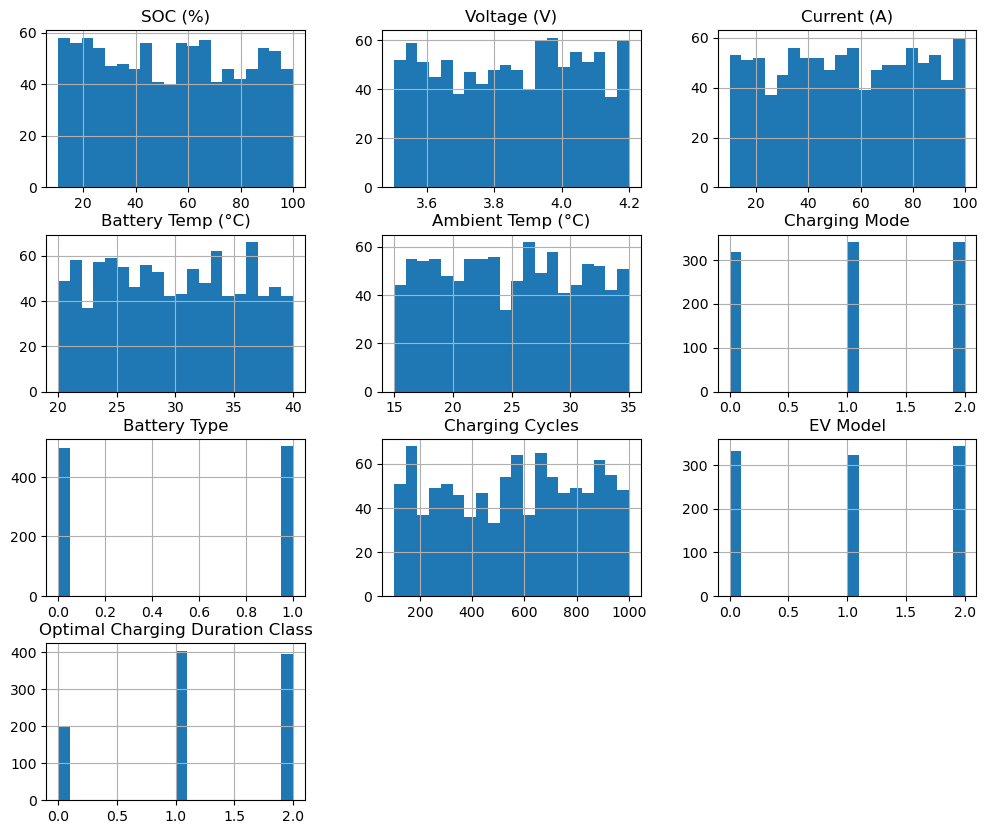

In [8]:
df.hist(bins=20, figsize=(12, 10))
plt.show()

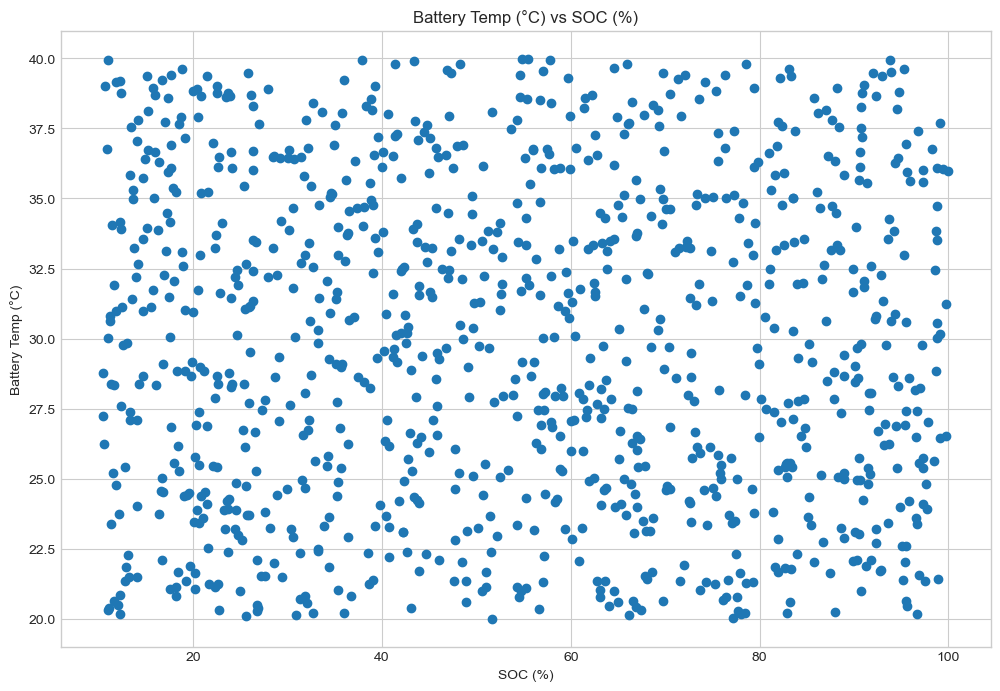

In [9]:
# Plot of daily averaged SoH and SoC data
plt.style.use('seaborn-v0_8-whitegrid')
fig1, ax = plt.subplots(figsize=(12,8))

ax.scatter(df['SOC (%)'], df['Battery Temp (°C)'])
ax.set_title('Battery Temp (°C) vs SOC (%)')
ax.set_ylabel('Battery Temp (°C)')
ax.set_xlabel('SOC (%)')
plt.show()

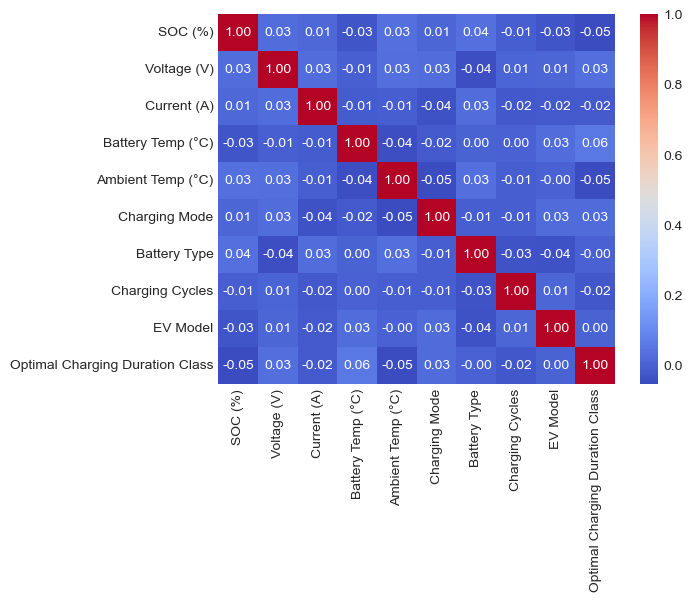

In [10]:
corr_matrix = df.corr()

plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()